<a href="https://colab.research.google.com/github/dangcaptkd/temp1/blob/master/intro_toTensoflow_basic_classification_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This intro uses tk.keras, a high-level API to build and train model in Tensorflow

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Use the fashion_mnist dataset in keras.datasets.
(keras.datasets provide a few toy datasets (already vectorized, in numpy format))

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 Numpy arrays, with pixel values ranging from 0 to 255. The labels are an array of intergers, ranging from 0 to 9. These correspond to the class of clothing the image represents: T-shirt/top, Trouser, Pullover, Dress, coat, sandal, Shirt, Sneaker, Bag and Ankel boot.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

# Explore the data

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocess the data

The data must be preprocessed before training. 
See the pixel values fall in the range of 0 to 255:

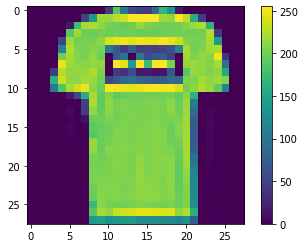

In [7]:
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the nerual network model. To do so, divide the values by 255. 

It's import that the training set and the testing set be preprocessed in the same way.

In [0]:
train_images = train_images/255
test_images = test_images/255

Let's display the first 25 images from the training set and the name below them to verify that the data is in the correct format.

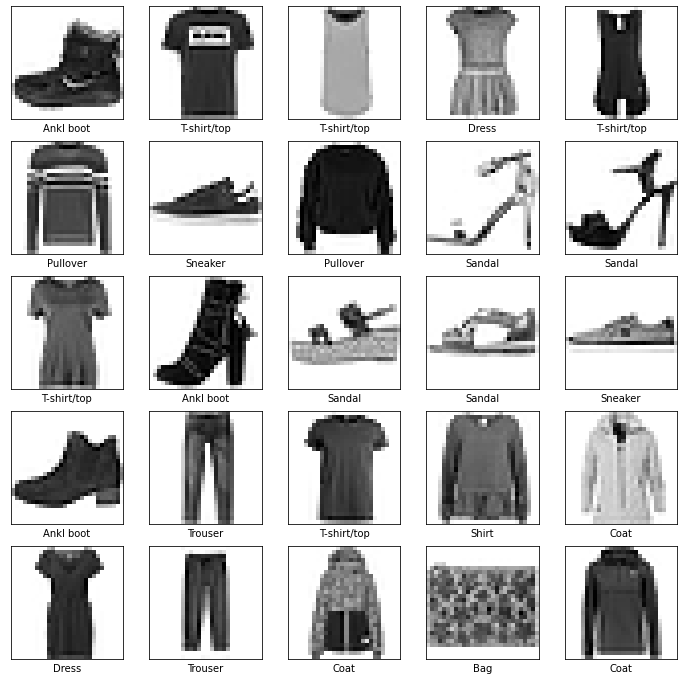

In [9]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Building a neural network requires configuring the layers of the model, then compiling the model.

**Set up the layer**

The basic building block of a neural network is the layer. 

Most layers, such as tk.keras.layers.Dense, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10)
])

1) tf.keras.layers.Flatten: transforms the format of images from a two-dimentional array (28x28) to a one-dimentional array (28x28=784 pixels). This layer has no parameters to learn, it only reformats the data

2) tk.keras.layers.Dense: these are densely connected or fully connected, neural layers
  
  +) The first Dense has 128 nodes (or neurons). 
  
  +) The last Dense returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. 

**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step.


*   Loss Function: This measures how accurate the model is during training. You want to minimize this function to control model in the right direction.
*   Optimizer: This is how the model update is updated based on the data it sees and is loss function.

*   Metrics: Used to monitor the training and the testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.





In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

In [12]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5011 - accuracy: 0.8239
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8662
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8791
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8861
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.8992
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9077
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

Evaluate accuracy

In [13]:
test_loss, tess_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3413 - accuracy: 0.8872


**Make predictions**

Attach a softmax layer to convert the logits to probabilities, which are easier to interpret

In [0]:
probability_model = keras.Sequential([
                                      model,
                                      keras.layers.Softmax()])

In [0]:
prediction = probability_model.predict(test_images)

Take a look at the first prediction 

In [16]:
prediction[0]

array([6.8959549e-10, 2.9662431e-07, 7.9349215e-11, 3.9810824e-10,
       1.3647775e-10, 9.7711709e-06, 1.1259661e-09, 8.1453733e-03,
       4.5259143e-09, 9.9184459e-01], dtype=float32)

A prediction is an array of 10 numbers. They present the model's "confidence" that the images correspond to each of 10 different articles of clothing. We can see which label has the highest confidence value.

In [17]:
np.argmax(prediction[0])

9

In [0]:
def plot_image(i, prediction_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label],
                                        color=color))

def plot_value_array(i, prediction_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

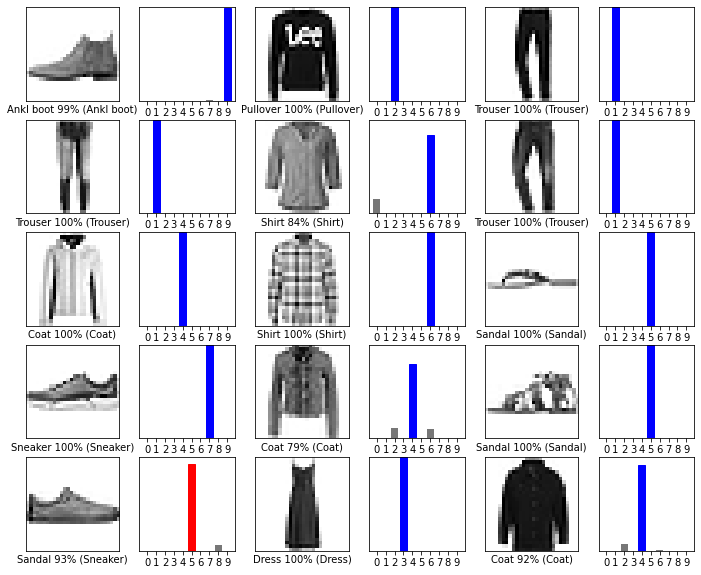

In [39]:
row = 5
col = 3
plt.figure(figsize=(2*2*col,2*row))
for i in range(row*col):
  plt.subplot(row, 2*col, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(row, 2*col, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.show()

Oh, there is a wrong prediction here :))